In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [31]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

def xpercent_scale():
    gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in gca().get_xticks()])

In [3]:
sample_info = pd.read_csv('middle_sample_info.csv', index_col=0)
results = pd.read_csv('middle_final_results.csv', index_col=0)
ms_results = pd.read_csv('middle_MS_results.csv', index_col=0)

In [4]:
df = pd.read_csv('data/rep6/middle_exp_mat.csv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

dfm = np.log10(df + 1)

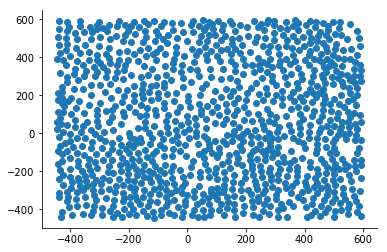

In [5]:
figsize(6, 4)
plt.scatter(sample_info.abs_X, sample_info.abs_Y);

In [6]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)
ms_results['pval'] = ms_results['pval'].clip_lower(ms_results.query('pval > 0')['pval'].min() / 2)
ms_results['qval'] = ms_results['qval'].clip_lower(ms_results.query('qval > 0')['qval'].min() / 2)

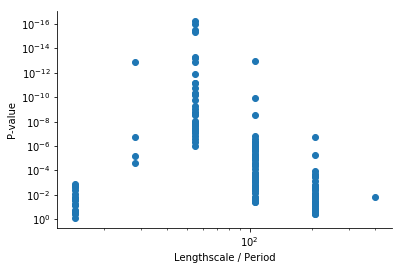

In [7]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

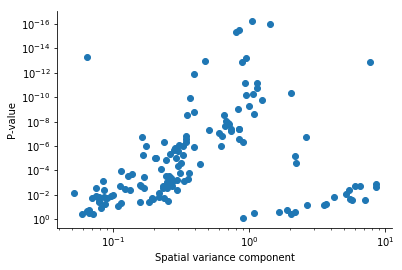

In [8]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

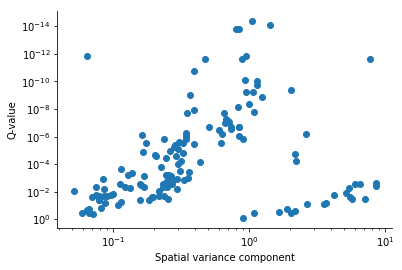

In [9]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Q-value');

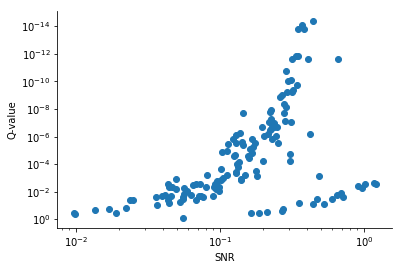

In [10]:
plt.loglog()
plt.scatter(1./results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Q-value');

In [11]:
results.query('qval < 0.05').shape

(122, 17)

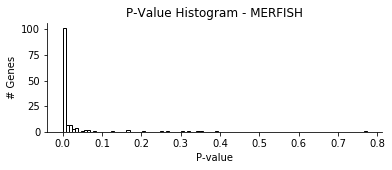

In [12]:
figsize(6, 2)
plt.hist(results.query('pval < 1.')['pval'], bins=100, color='w', ec='k');
plt.title('P-Value Histogram - MERFISH')
plt.ylabel('# Genes')
plt.xlabel('P-value');
# plt.ylim(ymax=400)

In [13]:
ms_results.model.value_counts()

SE        87
PER       34
linear     1
Name: model, dtype: int64

In [14]:
N = 5
top_per_ls = ms_results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,BIC,Gower,LLR,M,fraction_spatial_variance,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,time,pval,qval,max_ll_null
35,1519.276576,0.999497,9.792328,4,0.505281,ANKH,14.490174,0.978605,-745.713801,-3.797725,5.946227,SE,1056,0.000527,1.752415e-03,2.850931e-03,-755.506129
36,1500.372654,0.999497,6.050163,4,0.394894,Blank-9,14.490174,1.531558,-736.261840,-3.526839,4.191396,SE,1056,0.000710,1.390501e-02,1.836511e-02,-742.312004
38,2548.906157,0.996387,54.701055,4,0.396386,CENPF,28.116048,1.517295,-1260.528592,-6.732297,7.666613,SE,1056,0.000881,1.403322e-13,2.182945e-12,-1315.229646
40,742.638429,0.996387,27.269785,4,0.297072,MYH10,28.116048,2.357634,-357.394728,-4.234265,2.594877,SE,1056,0.001238,1.769551e-07,6.519399e-07,-384.664513
37,1317.347305,0.996387,20.285033,4,0.233402,CDYL2,28.116048,3.272592,-644.749165,-4.110561,2.174463,SE,1056,0.001554,6.672049e-06,1.668012e-05,-665.034198
39,970.849975,0.996387,17.649150,4,0.233314,HERC2,28.116048,3.274197,-471.500501,-4.158030,2.209942,SE,1056,0.001519,2.656340e-05,5.998187e-05,-489.149651
68,1002.476859,0.985082,73.034420,4,0.305148,SPTBN1,54.555049,2.243131,-487.313943,-4.252696,1.057549,SE,1056,0.001037,5.551115e-17,3.885781e-15,-560.348363
70,2377.925781,0.985082,69.957546,4,0.268783,THBS1,54.555049,2.679883,-1175.038404,-4.803833,1.414772,SE,1056,0.000917,1.110223e-16,7.771561e-15,-1244.995950
50,1358.152969,0.985082,66.264681,4,0.256060,COL5A1,54.555049,2.861989,-665.151998,-3.733500,0.805316,SE,1056,0.001047,4.440892e-16,1.554312e-14,-731.416679
53,1092.805468,0.985082,66.702543,4,0.274199,FASN,54.555049,2.607501,-532.478247,-3.816273,0.841411,SE,1056,0.001305,3.330669e-16,1.554312e-14,-599.180790


In [15]:
top_per_ls.shape

(38, 17)

In [16]:
import NaiveDE

dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm.T, 'np.log(cytoplasmArea)').T

In [17]:
from sklearn.preprocessing import scale

In [18]:
model_colors = {'SE': 'C0', 'PER': 'C1'}

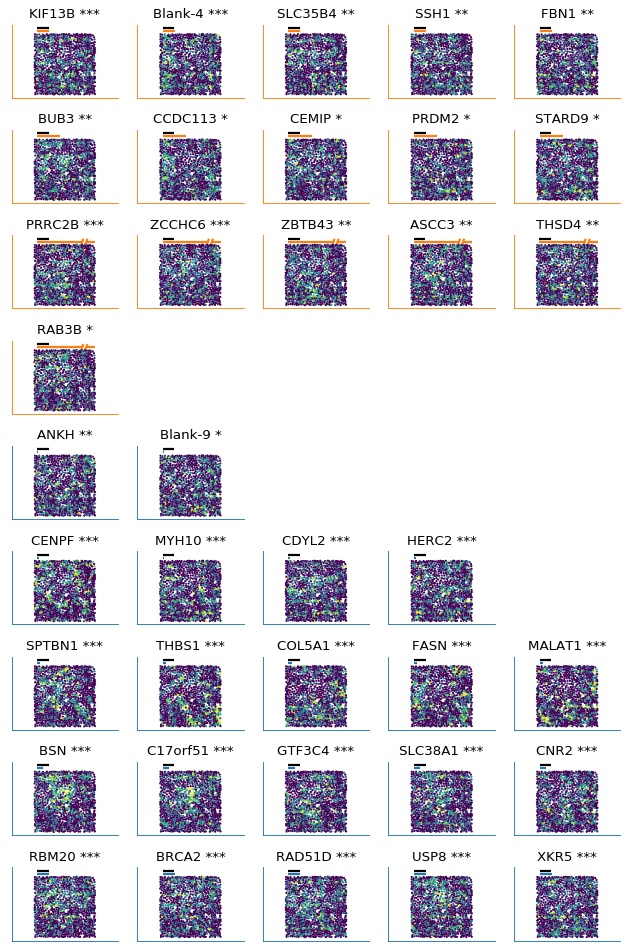

In [30]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)
        
        plt.scatter(sample_info.abs_X, sample_info.abs_Y,
                    c=scale(res[r['g']], with_std=True), s=1, vmin=0, vmax=2, rasterized=True);
        
        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'] + s)
        
        plt.xticks([])
        plt.yticks([])
        plt.hlines(700, -400, -200, lw=2)
        if -400 + r['l'] < 600:
            plt.hlines(650, -400, -400 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
        else:
            plt.hlines(650, -400, 380, lw=2, color=model_colors[r['model']], zorder=0)
            plt.plot([380 - 10, 380 + 10], [620, 680], lw=2, color=model_colors[r['model']], zorder=0)
            plt.plot([450 - 10, 450 + 10], [620, 680], lw=2, color=model_colors[r['model']], zorder=0)
            plt.hlines(650, 450, 600, lw=2, color=model_colors[r['model']], zorder=0)
            
        for spine in ax.spines.values():
            spine.set_edgecolor(model_colors[r['model']])
        
        plt.axis('equal')

plt.tight_layout()
plt.savefig('top_MF_genes_per_ls.pdf')

In [32]:
blank_genes = results[results.g.str.startswith('Blank-')]['g'].tolist()

In [33]:
N = 3
top_per_ls = ms_results.query('g not in @blank_genes and qval < 1e-4') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

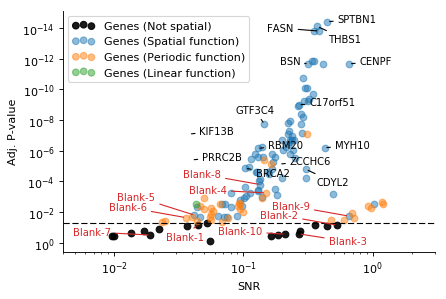

In [34]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')


tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.9, rasterized=True, label='Genes (Not spatial)', marker='o', color='k');


tmp = ms_results.query('model == "SE"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Spatial function)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic function)', marker='o', color='C1');

tmp = ms_results.query('model == "linear"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Linear function)', marker='o', color='C2');

# Annotate negative controls
tmp = results.query('g in @blank_genes')

x_offsets = {'Blank-3': 3e-1,
             'Blank-10': 1.5e0,
             'Blank-1': 9e-1}
y_offsets = {'Blank-3': 2e-1,
             'Blank-5': 1e1,
             'Blank-1': 1e-1,
             'Blank-4': 1e0,
             'Blank-10': 1,
             'Blank-7': 1}
for i, r in tmp.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] / x_offsets.get(r['g'], 2),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)
    
# Annotate top genes
x_offsets = {'FASN': 4e-1,
             'BSN': 6e-1,
             'GTF3C4': 6e-1}
y_offsets = {'THBS1': 1e-1,
             'CDYL2': 1e-1,
             'GTF3C4': 5e0,
             'BRCA2': 3e-1}
for i, r in top_per_ls.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 1.2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'], xy, xyt, color='k', arrowprops={'arrowstyle': '-'}, size=9)


plt.xlim(4e-3, 3e0)
plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('SNR');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

plt.savefig('sigma_pval_MF.pdf', bbox_inches='tight');

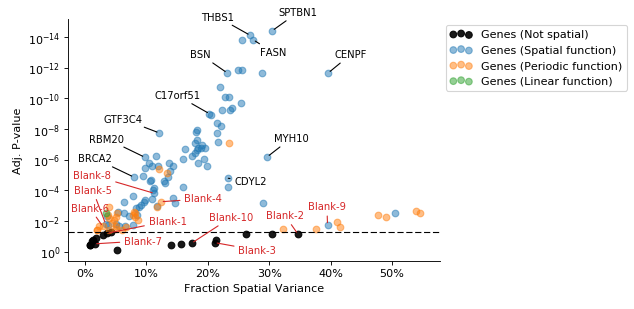

In [95]:
plt.figure(figsize=(6, 4), dpi=80)

plt.yscale('log')


tmp = results.query('qval > 0.05')
plt.scatter(tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.9, rasterized=True, label='Genes (Not spatial)', marker='o', color='k');


tmp = ms_results.query('model == "SE"')
tmp = tmp.drop('fraction_spatial_variance', 1).merge(results[['g', 'fraction_spatial_variance']], on='g')
plt.scatter(tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Spatial function)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('fraction_spatial_variance', 1).merge(results[['g', 'fraction_spatial_variance']], on='g')
plt.scatter(tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic function)', marker='o', color='C1');

tmp = ms_results.query('model == "linear"')
tmp = tmp.drop('fraction_spatial_variance', 1).merge(results[['g', 'fraction_spatial_variance']], on='g')
plt.scatter(tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Linear function)', marker='o', color='C2');

# Annotate negative controls
tmp = results.query('g in @blank_genes')

x_offsets = {'Blank-3': 0.1,
             'Blank-10': 0.1,
             'Blank-1': 0.1,
             'Blank-9': 0.03,
             'Blank-4': 0.1,
             'Blank-8': -0.07,
             'Blank-1': 0.13,
             'Blank-7': 0.11}
y_offsets = {'Blank-3': 2e-1,
             'Blank-5': 1e2,
             'Blank-1': 4e0,
             'Blank-4': 1e0,
             'Blank-10': 3e1,
             'Blank-7': 1}
for i, r in tmp.iterrows():
    xy = (r['fraction_spatial_variance'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 0.01),
           xy[1] / y_offsets.get(r['g'], 1e1),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)
    
# Annotate top genes
x_offsets = {'THBS1': -0.08,
             'BSN': -0.06,
             'GTF3C4': 0.1,
             'C17orf51': -0.09,
             'GTF3C4': -0.09,
             'RBM20': -0.09,
             'BRCA2': -0.09}
y_offsets = {'THBS1': 1e1,
             'CDYL2': 4e-1,
             'GTF3C4': 5e0,
             'BRCA2': 1e1,
             'FASN': 1e-1}
for i, r in top_per_ls.iterrows():
    xy = (r['fraction_spatial_variance'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 0.01),
           xy[1] / y_offsets.get(r['g'], 1e1),)
    plt.annotate(r['g'], xy, xyt, color='k', arrowprops={'arrowstyle': '-'}, size=9)


plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('Fraction Spatial Variance');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

xpercent_scale()
plt.legend(scatterpoints=3, loc='upper left', bbox_to_anchor=[1., 1.]);


plt.savefig('FSV_pval_MF.pdf', bbox_inches='tight');